<a href="https://colab.research.google.com/github/Venkatakkinapalli/Python-Examples/blob/master/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!pip install vaderSentiment

In [0]:
import tweepy
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import re

In [0]:
consumer_key='D9bEFGm5PbLrz0Zs13GHsIuFc'
consumer_secret='YD1VNc98CJGqlm3hU9Tqc6NQCIOttA8DBMPm4cZs2LNWuAa2jS'
access_key='988317695237029889-syutmcX4LwS51uKjiwodE0wHCZQN7QE'
access_secret='KL9CRufreRMeM0jgQbXVmBhcAncxpGuZ8ClvlCK25124C'

In [0]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_key,access_secret)
api= tweepy.API(auth)
that_word = 'New Zealand'
tweets= api.search(that_word,count=100)

In [0]:
def clean_tweets(data):
  clean =[]
  for i in range(data.shape[0]):
    clean.append(re.sub(r'(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(RT)','',data['Tweets'][i]))
  return clean 
               

In [0]:
data = pd.DataFrame([tweet.text for tweet in tweets], columns = ['Tweets'])


In [0]:
clean_tweets = clean_tweets(data)


In [0]:
data['CTweets']=clean_tweets[:]

In [65]:
import nltk
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
lists=[]
for tweet in data['Tweets']:
  lists.append(sid.polarity_scores(tweet))

data['Polarity'] = lists[:]

In [111]:
data['Polarity'][0]['neu']

0.606

In [112]:
neg,neu,pos = 0,0,0

for row in data['Polarity']:
  neg += row['neg']
  neu += row['neu']
  pos += row['pos']
print(neg,neu,pos)

10.721999999999996 66.47800000000002 7.8000000000000025


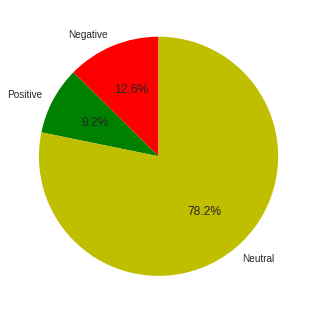

In [113]:
import matplotlib.pyplot as plt
polarity = [neg, pos, neu]
labels = ['Negative', 'Positive','Neutral']
colors = ['r', 'g','y']
plt.pie(polarity, labels=labels, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()